<a href="https://colab.research.google.com/github/mansh2060/Bitcoin-Price-Predictor/blob/main/Bitcoin%20Price%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
import yfinance as yf

ticker='btc-usd'

start_date='2024-01-01'
end_date='2024-12-30'

data=yf.download(tickers=ticker,start=start_date,end=end_date)

bitcoinprice=pd.DataFrame(data)

file_name='bitcoinprice.csv'

bitcoinprice=bitcoinprice.to_csv(file_name)


df=pd.read_csv('bitcoinprice.csv')



[*********************100%***********************]  1 of 1 completed


In [101]:
df=pd.read_csv('bitcoinprice.csv')

In [102]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01,44167.33203125,44167.33203125,44175.4375,42214.9765625,42280.234375,18426978443
3,2024-01-02,44957.96875,44957.96875,45899.70703125,44176.94921875,44187.140625,39335274536
4,2024-01-03,42848.17578125,42848.17578125,45503.2421875,40813.53515625,44961.6015625,46342323118


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      362 non-null    object
 1   Adj Close  361 non-null    object
 2   Close      361 non-null    object
 3   High       361 non-null    object
 4   Low        361 non-null    object
 5   Open       361 non-null    object
 6   Volume     361 non-null    object
dtypes: object(7)
memory usage: 19.9+ KB


In [104]:
df=df.drop(0)


In [105]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01,44167.33203125,44167.33203125,44175.4375,42214.9765625,42280.234375,18426978443
3,2024-01-02,44957.96875,44957.96875,45899.70703125,44176.94921875,44187.140625,39335274536
4,2024-01-03,42848.17578125,42848.17578125,45503.2421875,40813.53515625,44961.6015625,46342323118
5,2024-01-04,44179.921875,44179.921875,44770.0234375,42675.17578125,42855.81640625,30448091210


In [106]:
df=df.drop(1)

In [107]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
2,2024-01-01,44167.33203125,44167.33203125,44175.4375,42214.9765625,42280.234375,18426978443
3,2024-01-02,44957.96875,44957.96875,45899.70703125,44176.94921875,44187.140625,39335274536
4,2024-01-03,42848.17578125,42848.17578125,45503.2421875,40813.53515625,44961.6015625,46342323118
5,2024-01-04,44179.921875,44179.921875,44770.0234375,42675.17578125,42855.81640625,30448091210
6,2024-01-05,44162.69140625,44162.69140625,44353.28515625,42784.71875,44192.98046875,32336029347


In [108]:
df.rename(columns={'Price' : 'Date'}, inplace=True)
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2,2024-01-01,44167.33203125,44167.33203125,44175.4375,42214.9765625,42280.234375,18426978443
3,2024-01-02,44957.96875,44957.96875,45899.70703125,44176.94921875,44187.140625,39335274536
4,2024-01-03,42848.17578125,42848.17578125,45503.2421875,40813.53515625,44961.6015625,46342323118
5,2024-01-04,44179.921875,44179.921875,44770.0234375,42675.17578125,42855.81640625,30448091210
6,2024-01-05,44162.69140625,44162.69140625,44353.28515625,42784.71875,44192.98046875,32336029347


In [112]:
df['Date']=pd.to_datetime(df['Date'])

In [115]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [ ]:
df.info()

In [120]:
df.drop(columns=['Date'],inplace=True)

In [121]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Month,Day
2,44167.33203125,44167.33203125,44175.4375,42214.9765625,42280.234375,18426978443,1,1
3,44957.96875,44957.96875,45899.70703125,44176.94921875,44187.140625,39335274536,1,2
4,42848.17578125,42848.17578125,45503.2421875,40813.53515625,44961.6015625,46342323118,1,3
5,44179.921875,44179.921875,44770.0234375,42675.17578125,42855.81640625,30448091210,1,4
6,44162.69140625,44162.69140625,44353.28515625,42784.71875,44192.98046875,32336029347,1,5


In [122]:
for column in df:
  df[column]=pd.to_numeric(df[column])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 2 to 361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  360 non-null    float64
 1   Close      360 non-null    float64
 2   High       360 non-null    float64
 3   Low        360 non-null    float64
 4   Open       360 non-null    float64
 5   Volume     360 non-null    int64  
 6   Month      360 non-null    int32  
 7   Day        360 non-null    int32  
dtypes: float64(5), int32(2), int64(1)
memory usage: 19.8 KB


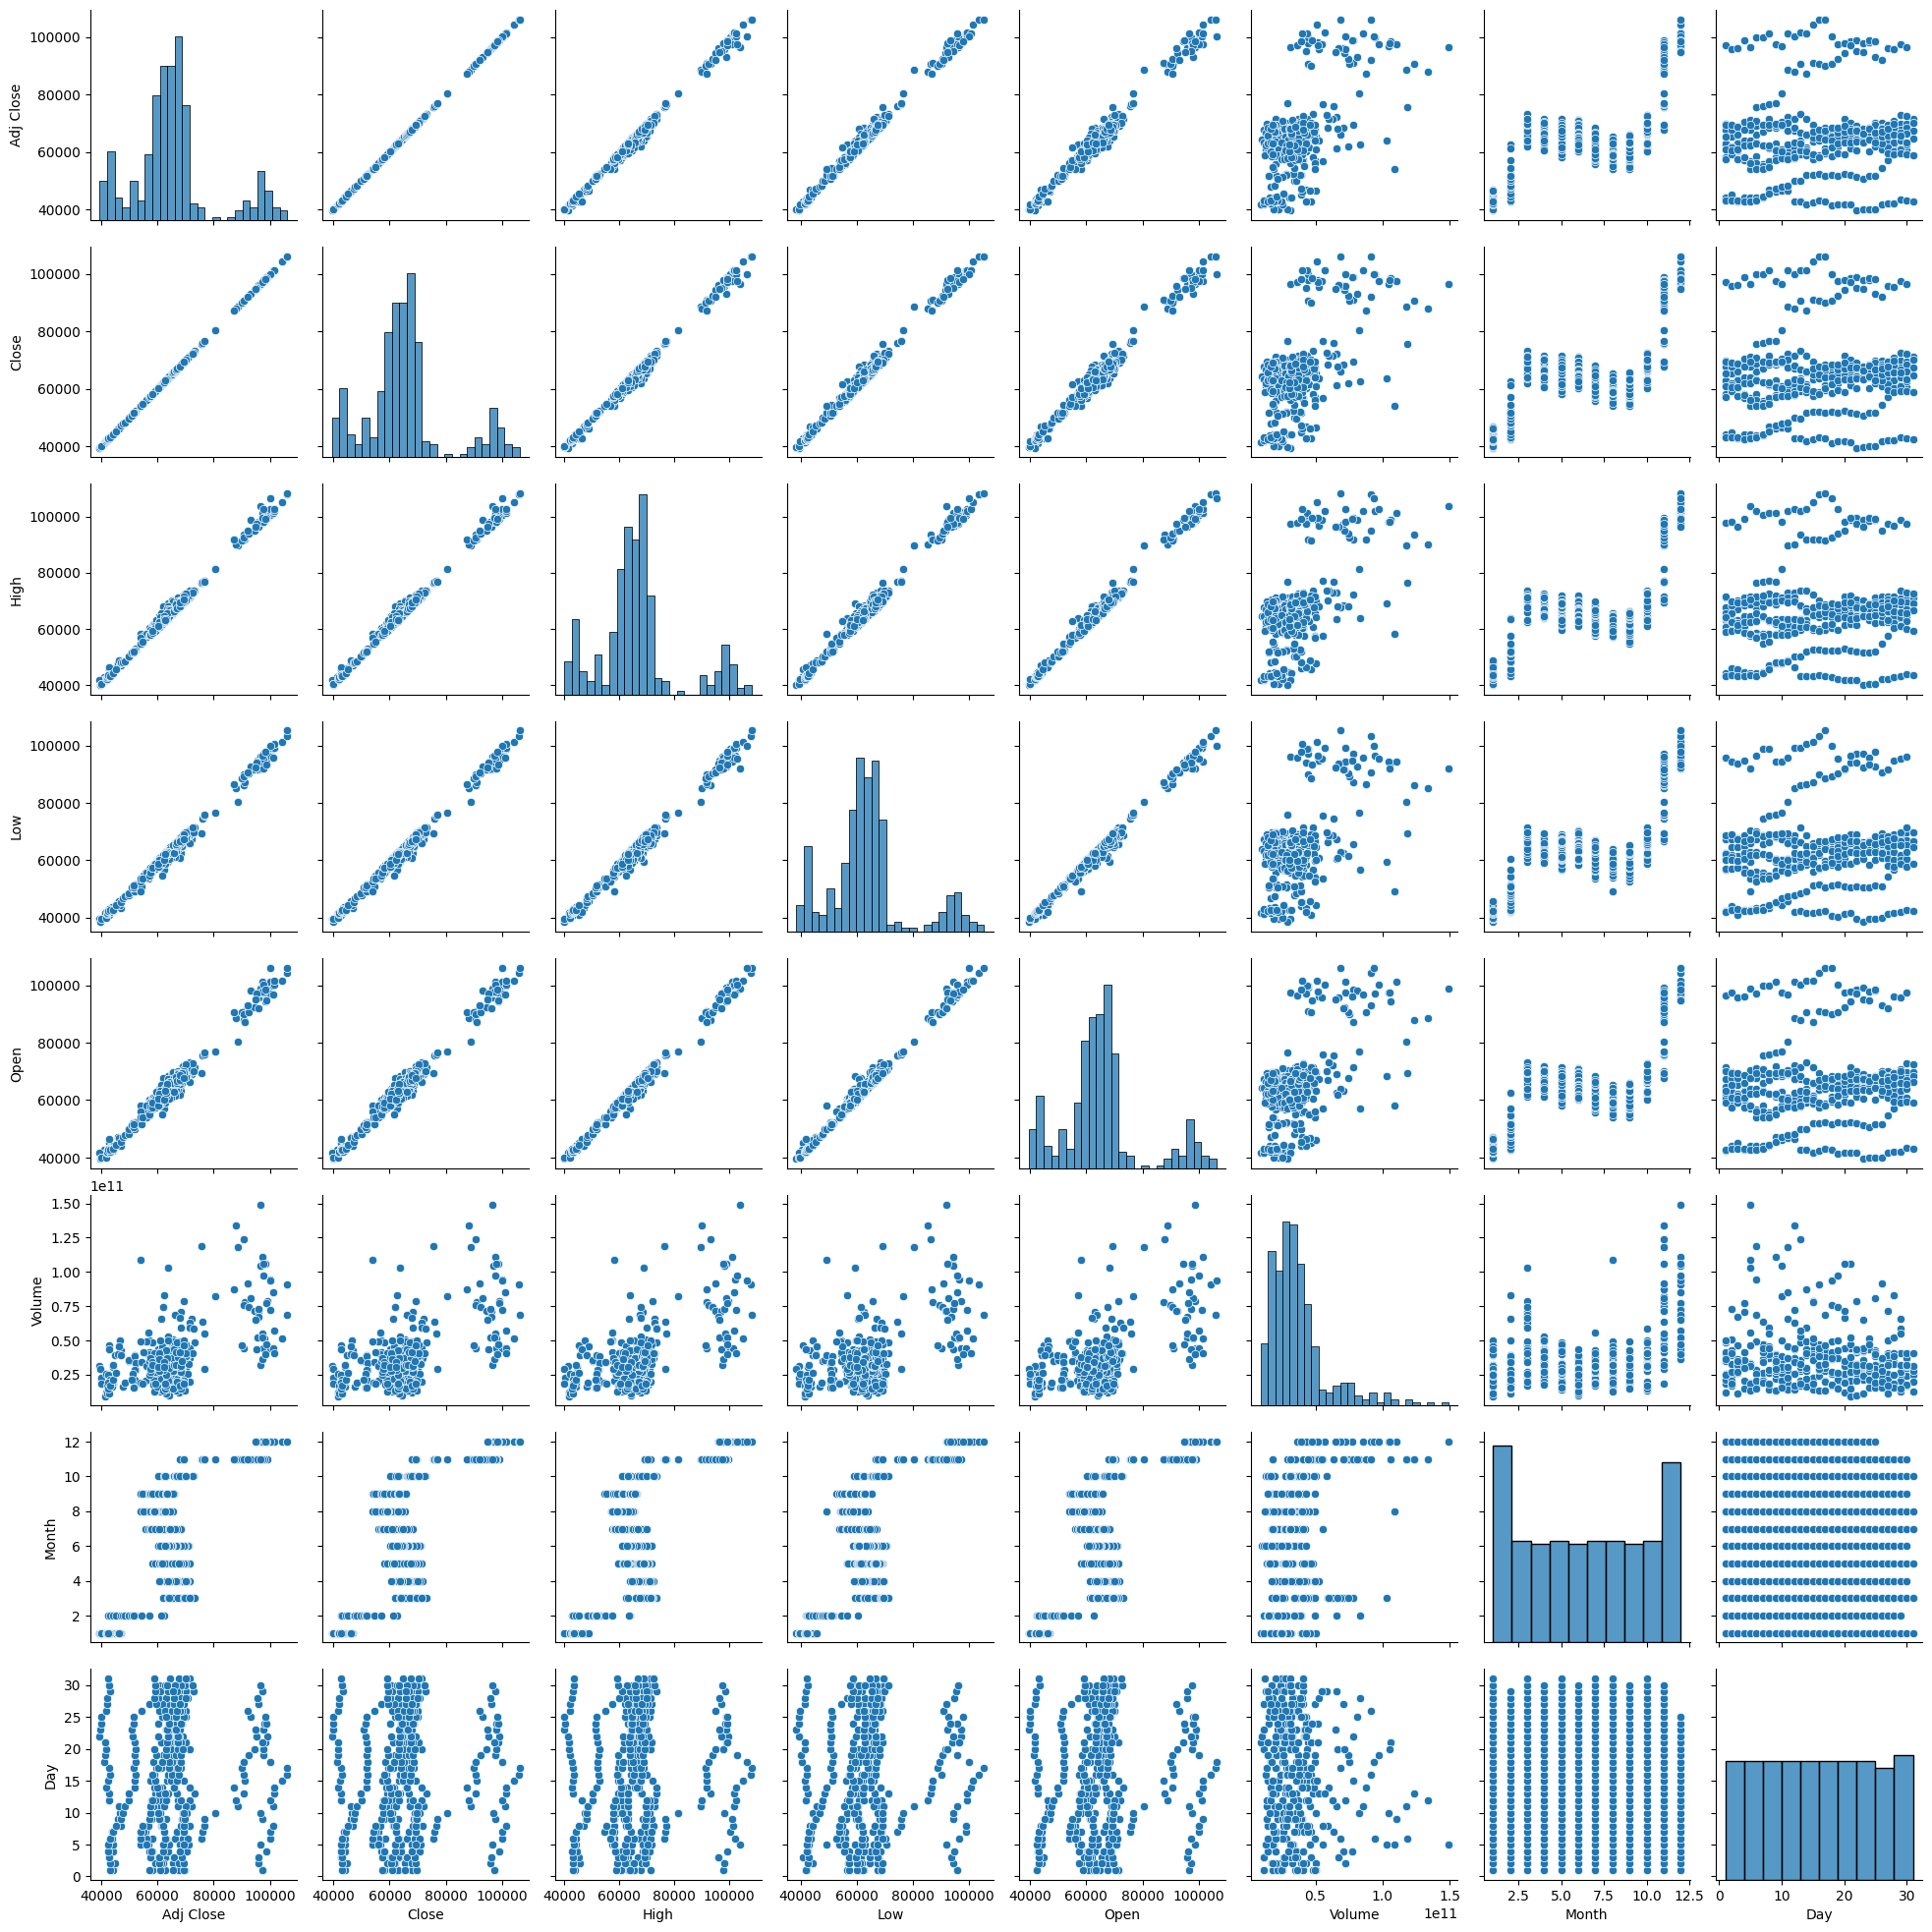

In [124]:
#pairplot
sns.pairplot(df)



Text(0.5, 1.0, 'Heatmap')

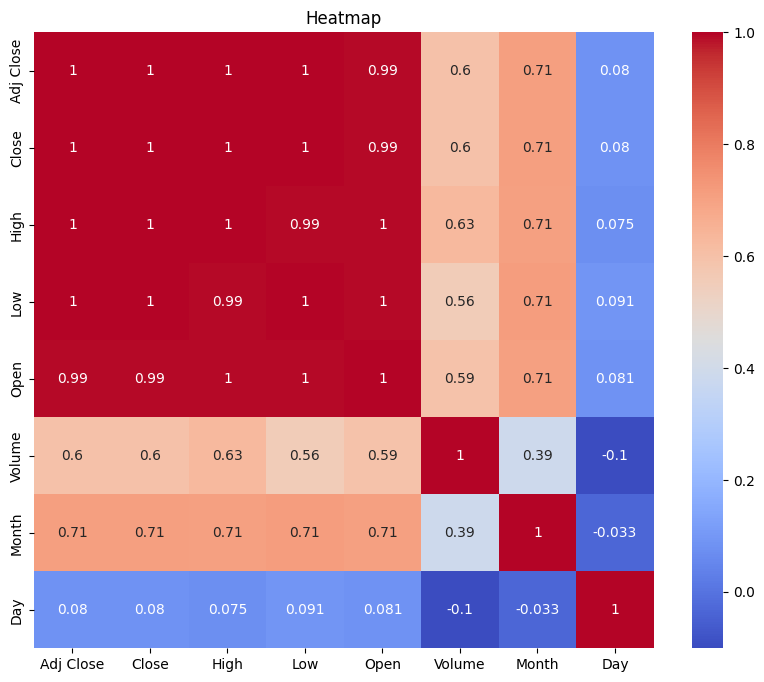

In [125]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Heatmap")

Text(0.5, 1.0, 'Price vs Month')

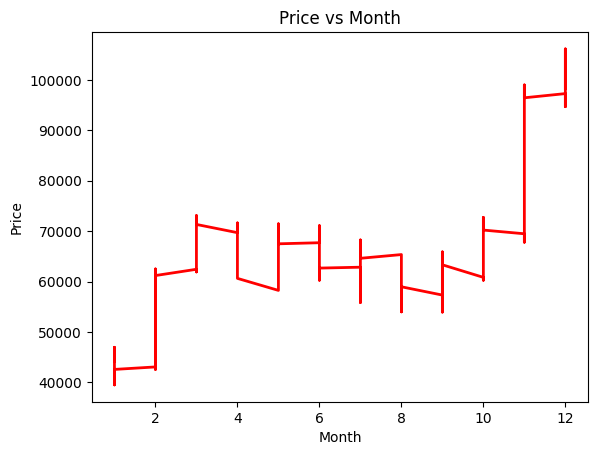

In [130]:
Month=df['Month']
Adj_close=df['Adj Close']
plt.plot(Month, Adj_close, color='red', linewidth=2)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Price vs Month")

In [131]:
x=df[['High','Low','Open']]
y=df[['Adj Close']]

In [132]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
from sklearn.linear_model import LinearRegression
mult_regression=LinearRegression()
mult_regression.fit(X_train,y_train)

LinearRegression()

In [134]:
y_pred=mult_regression.predict(x_test)
print(y_pred)

[[ 59610.3176312 ]
 [ 49590.13852544]
 [ 63120.04671094]
 [ 72799.43542687]
 [ 53933.65546644]
 [ 65521.14056216]
 [ 43101.76506751]
 [ 57028.49186801]
 [ 56613.84214918]
 [ 63911.85844733]
 [ 65021.0627191 ]
 [ 94137.10996545]
 [ 68426.33511057]
 [ 98521.78276825]
 [ 62987.80529337]
 [ 64272.49560406]
 [ 67187.50086114]
 [ 67727.41791596]
 [ 66714.49141105]
 [ 94933.56623188]
 [ 70559.9138722 ]
 [ 60808.0247061 ]
 [ 93736.31371457]
 [ 43062.25051681]
 [ 68192.18078897]
 [ 61523.55238138]
 [ 69932.8215866 ]
 [ 97946.88561127]
 [ 41830.30938971]
 [ 70463.31441459]
 [ 63941.49307572]
 [ 46316.88747163]
 [100687.23479937]
 [ 67832.05578749]
 [ 66278.79325833]
 [ 47723.04481137]
 [ 39354.5298709 ]
 [107031.90644461]
 [ 68136.87041246]
 [ 70908.63315012]
 [ 60796.13149743]
 [ 43129.82479865]
 [ 70212.32994373]
 [ 63324.605151  ]
 [ 70663.94529667]
 [ 60422.80432664]
 [ 51595.12207718]
 [ 43671.53474629]
 [ 52266.61036785]
 [100019.85900427]
 [ 62289.03435967]
 [ 64454.38921888]
 [ 67523.667

In [135]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rscore=r2_score(y_test,y_pred)

In [136]:
print(f'Mean squared error is {mse} and r square error is {rscore}')

Mean squared error is 620153.416168121 and r square error is 0.9975170253499416


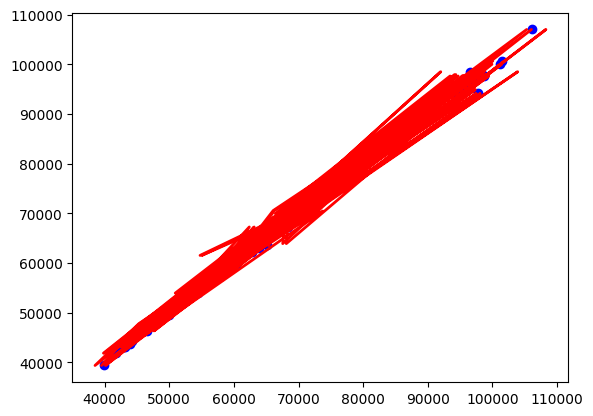

In [137]:
plt.scatter(y_test,y_pred,color='blue',label='Actual data')
plt.plot(x_test,y_pred,color='red',linewidth=2,label='RegressionLine')


In [138]:
high=int(input("Enter Today High        :"))
low=int(input("Enter Today Low          :"))
open=int(input("Enter Today Open        :"))

value_array=np.array([[high,low,open]])


Enter Today High        :99349
Enter Today Low          :97632
Enter Today Open        :98663


In [139]:
predicted_close=mult_regression.predict(value_array)
print("Bitcoin Price        :",predicted_close)

Bitcoin Price        : [[98138.63534678]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
